In [1]:
import pandas as pd
import numpy as np

In [2]:
test = pd.read_csv(r'C:\Users\samsung\Desktop\PSAT\주제분석 2주차 패키지\test.csv')
train = pd.read_csv(r'C:\Users\samsung\Desktop\PSAT\주제분석 2주차 패키지\train.csv')

In [3]:
#1.2 단위 수정

train_y = train.price
train_x = train.drop('price', axis = 1)

In [4]:
#1.3 validatino set 분할 - 첫번째

from sklearn.model_selection import train_test_split

X_train1, X_valid1, Y_train1, Y_valid1 = train_test_split(train_x, train_y, test_size=0.2)

In [5]:
#1.4 질문
'''데이터에 시계열 자료가 존재하기 때문에 random하게 data를 split하면 안되고 순서대로 앞에서 잘라줘야 합니다.'''

'데이터에 시계열 자료가 존재하기 때문에 random하게 data를 split하면 안되고 순서대로 앞에서 잘라줘야 합니다.'

In [6]:
# 1.5 validation set 분할- 두번째
idx = train_x[train_x['transaction_year']==4].index
X_valid = train_x[train_x['transaction_year']==4]
X_train = train_x.drop(train_x[train_x['transaction_year']==4].index, axis = 0)
Y_valid = train_y[idx]
Y_train = train_y.drop(train_y.index[idx])

In [7]:
! pip install category_encoders

In [8]:
from category_encoders.cat_boost import CatBoostEncoder

In [9]:
cbe = CatBoostEncoder()
X_train_cbe = cbe.fit_transform(X_train, Y_train)
X_valid_cbe = cbe.transform(X_valid)

In [10]:
X_valid_cbe.head()

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
2451,89176.597368,86280.203194,107.91,14,4,9,-1.000000e+00,-1.836970e-16
2452,89176.597368,86280.203194,151.81,10,4,9,-1.000000e+00,-1.836970e-16
2453,89176.597368,86280.203194,94.51,2,4,9,-2.449294e-16,1.000000e+00
2454,89176.597368,86280.203194,94.28,12,4,9,-2.449294e-16,1.000000e+00
2455,103789.156533,107170.755379,145.96,13,4,13,-1.000000e+00,-1.836970e-16


<AxesSubplot:>

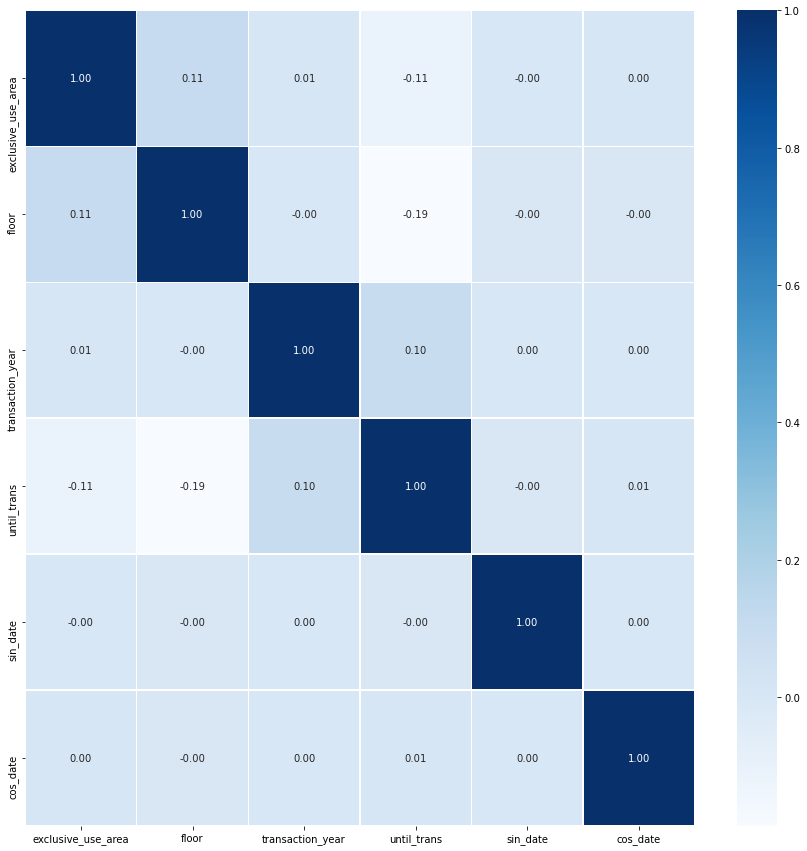

In [11]:
#2 릿지 회귀
# 2.1 상관계수 플랏

import matplotlib.pyplot as plt 
import seaborn as sns   

plt.figure(figsize=(15,15))
sns.heatmap(data = X_train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [12]:
#2.2 릿지튜닝

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1]
rlist = []

for i in alpha:
    ridge = Ridge(alpha = i)
    ridge.fit(X_train_cbe, Y_train)
    y_pred = ridge.predict(X_valid_cbe)
    mse = mean_squared_error(Y_valid, y_pred)
    rmse = np.sqrt(mse)
    rlist.append(rmse)
    print('RMSE: {0:.10f}\n'.format(rmse))
    

RMSE: 14777.8814195020

RMSE: 14777.8814195924

RMSE: 14777.8814204962

RMSE: 14777.8814295334

RMSE: 14777.8815199062



<function matplotlib.pyplot.show(close=None, block=None)>

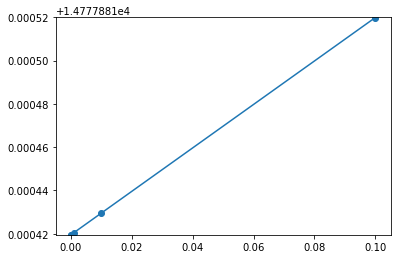

In [13]:
# 2.3 시각화

from matplotlib import pyplot as plt

plt.scatter(alpha, rlist)
plt.yscale('linear')
plt.xscale('linear')
plt.ylim((14777.88141950, 14777.88152))
plt.plot(alpha, rlist)
plt.show

In [14]:
# 2,4 해석

'''튜닝이 잘 되지 않았습니다. Ridge regression을 돌리기에는 변수간의 상관관계가 거의 없다시피 했다는 점을 이유로 들 수 있겠습니다. 또 튜닝파라미터 alpha값 역시 지나치게 작아 penalty가 크게 적용되지 않았기 때문에 Ridge regression의 RMSE값이 alpha에 따라 유의미한 차이를 보이지 않았습니다. '''

'튜닝이 잘 되지 않았습니다. Ridge regression을 돌리기에는 변수간의 상관관계가 거의 없다시피 했다는 점을 이유로 들 수 있겠습니다. 또 튜닝파라미터 alpha값 역시 지나치게 작아 penalty가 크게 적용되지 않았기 때문에 Ridge regression의 RMSE값이 alpha에 따라 유의미한 차이를 보이지 않았습니다. '

In [15]:
# 2.5 그냥 선형 모형으로!

from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(X_train_cbe, Y_train)
y_pred = lr.predict(X_valid_cbe)
mse = mean_squared_error(Y_valid, y_pred)
rmse = np.sqrt(mse)
print(rmse)

14777.881419492343


In [17]:
'''Ridge regressino과 rmse값이 크게 차이가 나지 않습니다. 애초에 페널티를 주어 변수를 shrink 시킬만큼 변수간의 상관관계가 존재하지도 않기 때문에 굳이 alpha값 조절해가며 ridge regression 하는 것보다 간단하게 linear regression 하는 게 더 나아보입니다.'''

'Ridge regressino과 rmse값이 크게 차이가 나지 않습니다. 애초에 페널티를 주어 변수를 shrink 시킬만큼 변수간의 상관관계가 존재하지도 않기 때문에 굳이 alpha값 조절해가며 ridge regression 하는 것보다 간단하게 linear regression 하는 게 더 나아보입니다.'

In [18]:
#3 LightGBM

! pip install lightgbm

In [19]:
#3.1 LightGBM 이해
'''LGBM은 기본적으로 leaf-wise tree를 생각하면 쉽습니다. LGBM은 거대한 데이터를 가볍게 다루는 데 특화되어 있는 모델입니다. 따라서 학습 시간이 짧고 메모리 사용이 적습니다. 그러나 작은 데이터에 적용할 경우 과적합 발생합니다. '''

'LGBM은 기본적으로 leaf-wise tree를 생각하면 쉽습니다. LGBM은 거대한 데이터를 가볍게 다루는 데 특화되어 있는 모델입니다. 따라서 학습 시간이 짧고 메모리 사용이 적습니다. 그러나 작은 데이터에 적용할 경우 과적합 발생합니다. '

In [20]:
#3.2 LGBM 튜닝

import lightgbm as lgb
from lightgbm import LGBMModel, LGBMRegressor
from sklearn.model_selection import GridSearchCV

learning_rate = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.99]

train_ds = lgb.Dataset(X_train_cbe, label = Y_train)
test_ds = lgb.Dataset(X_valid_cbe, Y_valid)
for i in (learning_rate):
    params = {'learning_rate': i}
    model = lgb.train(params, train_ds, 500, test_ds, verbose_eval = 100)
    y_pred = model.predict(X_valid_cbe)
    mse = mean_squared_error(Y_valid, y_pred)
    rmse = np.sqrt(mse)
    print('RMSE: {0:.10f}\n'.format(rmse))



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 312466, number of used features: 8
[LightGBM] [Info] Start training from score 46056.618349
RMSE: 12157.4419704691

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 312466, number of used features: 8
[LightGBM] [Info] Start training from score 46056.618349
RMSE: 11212.7761401961

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bin

In [21]:
#3.4 튜닝에 대하여 알아보자

'''Grid Search는 최적의 하이퍼 파라미터를 찾기 위해 파라미터 조합을 사용합니다. 따라서 모든 조합을 다 하나씩 확인합니다. 따라서 정확하지만 느립니다. 반대로 Random Search는 모든 조합을 시도하는 대신 각 하이퍼 파라미터를 랜덤으로 대입하여 설정한 반복횟수만큼 탐색합니다. 따라서 빠르지만 모든 조합을 고려하지 않게 되죠. 베이즈 최적화는 입력값을 받는 target function을 만들어서 그 function값을 최대로 하는 하이퍼 파라미터를 찾는 방법입니다. 베이즈 최적화는 그리드 서치나 랜덤 서치보다 효율적이지만 사전 정보가 필요합니다.'''

'Grid Search는 최적의 하이퍼 파라미터를 찾기 위해 파라미터 조합을 사용합니다. 따라서 모든 조합을 다 하나씩 확인합니다. 따라서 정확하지만 느립니다. 반대로 Random Search는 모든 조합을 시도하는 대신 각 하이퍼 파라미터를 랜덤으로 대입하여 설정한 반복횟수만큼 탐색합니다. 따라서 빠르지만 모든 조합을 고려하지 않게 되죠. 베이즈 최적화는 입력값을 받는 target function을 만들어서 그 function값을 최대로 하는 하이퍼 파라미터를 찾는 방법입니다. 베이즈 최적화는 그리드 서치나 랜덤 서치보다 효율적이지만 사전 정보가 필요합니다.'

In [22]:
#4 test set

In [23]:
#4.! test set 불러오기
test_x = test.drop('price',axis = 1)
test_y = test['price']

In [24]:
#4.2 catboost 인코딩

cbe2 = CatBoostEncoder()
Whole_train_cbe = cbe.fit_transform(train_x, train_y)
Whole_valid_cbe = cbe.transform(test_x)
Whole_valid_cbe.head()

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
0,91827.227742,89369.051084,70.80,1,5,10,-1.000000e+00,-1.836970e-16
1,91827.227742,89369.051084,94.51,8,5,10,-2.449294e-16,1.000000e+00
2,91827.227742,89369.051084,160.85,11,5,10,-2.449294e-16,1.000000e+00
3,91827.227742,89369.051084,94.51,6,5,10,1.000000e+00,3.061617e-16
4,91827.227742,89369.051084,136.40,3,5,10,1.000000e+00,3.061617e-16


In [25]:
#4.3 최적의 파라미터 적합
#Linear Regression

lr2 = LinearRegression()
lr2.fit(Whole_train_cbe, train_y)
y_pred = lr2.predict(Whole_valid_cbe)
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
print(rmse)

16350.627412822749


In [26]:
#4.3 최적의 파라미터 적합
#LGBM

Whole_train_ds = lgb.Dataset(Whole_train_cbe, label = train_y)
Whole_test_ds = lgb.Dataset(Whole_valid_cbe, test_y)

params = {'learning_rate': 0.3}
model = lgb.train(params, Whole_train_ds, 500, Whole_test_ds, verbose_eval = 100)
y_pred = model.predict(Whole_valid_cbe)
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
print('RMSE: {0:.10f}\n'.format(rmse))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 422164, number of used features: 8
[LightGBM] [Info] Start training from score 48041.092876
RMSE: 12054.5916315652



In [27]:
#4.4 test set에 대해 평가

'''test set에 선형회귀 모델과 LGBM모델을 적용한 결과 LGBM 모델의 test RMSE가 더 작게 나왔습니다. 역시 부스팅 계열 모델이 일반 회귀 모델보다 성능이 좋음을 확인합니다. '''

'test set에 선형회귀 모델과 LGBM모델을 적용한 결과 LGBM 모델의 test RMSE가 더 작게 나왔습니다. 역시 부스팅 계열 모델이 일반 회귀 모델보다 성능이 좋음을 확인합니다. '